Table of Contents:
1. Import libraries & data.
2. Set theme for plots.
3. Bar chart.
4. Dual-axis line plot.
5. Box plot.
6. FacetGrid.

1. Import libraries & data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
# Set project paths
PROJECT_DIR = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_DIR / "data"

PROJECT_DIR, DATA_DIR

(PosixPath('/Users/samantha.lisik/Documents/citibike'),
 PosixPath('/Users/samantha.lisik/Documents/citibike/data'))

In [3]:
csv_path = DATA_DIR / "processed" / "citibike_2022_with_weather.csv"
csv_path.exists(), csv_path

(True,
 PosixPath('/Users/samantha.lisik/Documents/citibike/data/processed/citibike_2022_with_weather.csv'))

In [4]:
# Load a smaller sample of the data to avoid memory issues
df_sample = pd.read_csv(csv_path, nrows=50_000, low_memory=False)
df_sample.shape, df_sample.head()

((50000, 16),
             ride_id  rideable_type               started_at  \
 0  0CC1D7F53FA21F9A  electric_bike  2022-11-02 05:54:11.481   
 1  EDAECDAE6BF903DE   classic_bike  2022-11-02 18:20:15.611   
 2  37C06FED49069B80  electric_bike  2022-11-04 18:39:39.873   
 3  63751973E9A95FB1   classic_bike  2022-11-09 18:02:29.616   
 4  F7410DEDF925FBA8  electric_bike  2022-11-12 10:23:11.805   
 
                   ended_at    start_station_name  start_station_id  \
 0  2022-11-02 06:08:27.471   Park Ave & E 162 St           8016.07   
 1  2022-11-02 19:00:24.787    Broadway & W 61 St           7014.12   
 2  2022-11-04 18:44:01.851      W 54 St & 11 Ave           6955.05   
 3  2022-11-09 18:19:28.693    Broadway & W 41 St           6560.01   
 4  2022-11-12 10:28:24.794  William St & Pine St           5065.12   
 
          end_station_name  end_station_id  start_lat  start_lng    end_lat  \
 0   Jerome Ave & W 193 St         8619.02  40.825701 -73.915644  40.866590   
 1  Leonard St

2. Set theme for plots.

In [5]:
# Set a global seaborn theme for all plots
sns.set_theme(
    style="whitegrid",
    palette="Blues_r",
    context="talk"
)

3. Bar chart.

In [49]:
# Bar chart: Top 20 starting stations
top_stations = (
    df_sample.groupby("start_station_name")
      .size()
      .reset_index(name="trip_count")
      .sort_values("trip_count", ascending=False)
      .head(20)
)

top_stations

,start_station_name,trip_count
862,Grand Army Plaza & Central Park S,1125
440,Broadway & W 58 St,636
224,5 Ave & E 78 St,378
547,Columbus Ave & W 72 St,320
690,E 20 St & FDR Dr,289
225,5 Ave & E 87 St,284
223,5 Ave & E 72 St,274
1368,W 13 St & 5 Ave,268
191,46 Ave & 5 St,255
261,6 Ave & W 33 St,249


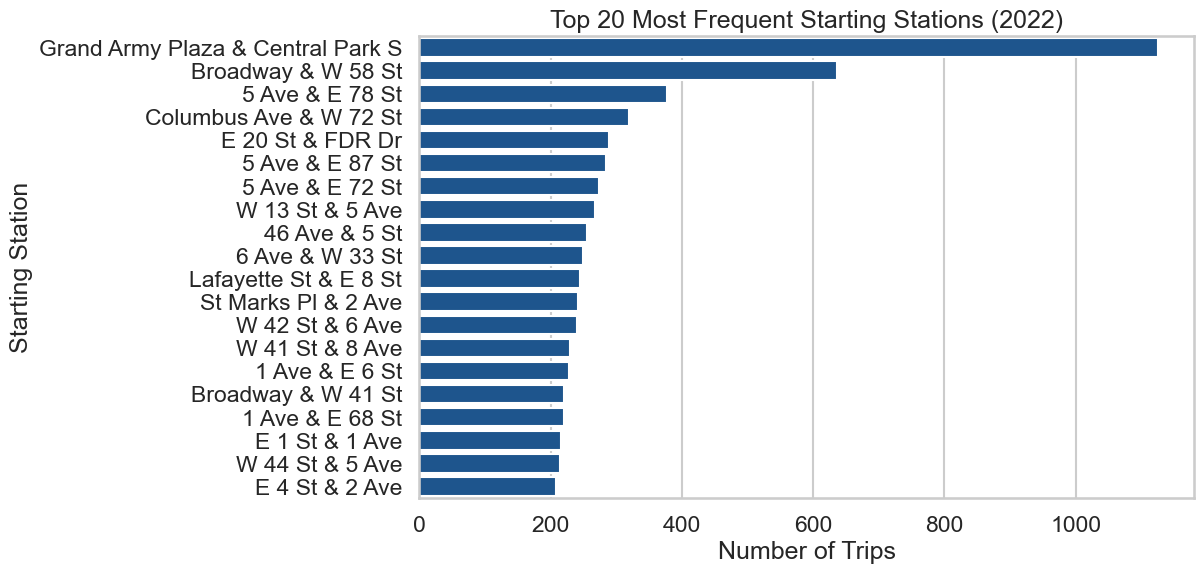

In [7]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_stations,
    x="trip_count",
    y="start_station_name"
)

plt.title("Top 20 Most Frequent Starting Stations (2022)")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station")
plt.show()

In [9]:
# Order the bars by frequency
top_stations = top_stations.sort_values("trip_count", ascending=False)

In [10]:
# Create a color gradient mapped to trip counts
import matplotlib.colors as mcolors

# Create a normalized color scale
norm = plt.Normalize(
    top_stations["trip_count"].min(),
    top_stations["trip_count"].max()
)

# Generate colors from a colormap
colors = plt.cm.Blues(norm(top_stations["trip_count"]))

/var/folders/s0/tyllrxjd18l9z7g_0x8hn4x80000gp/T/ipykernel_66062/1369576545.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues")


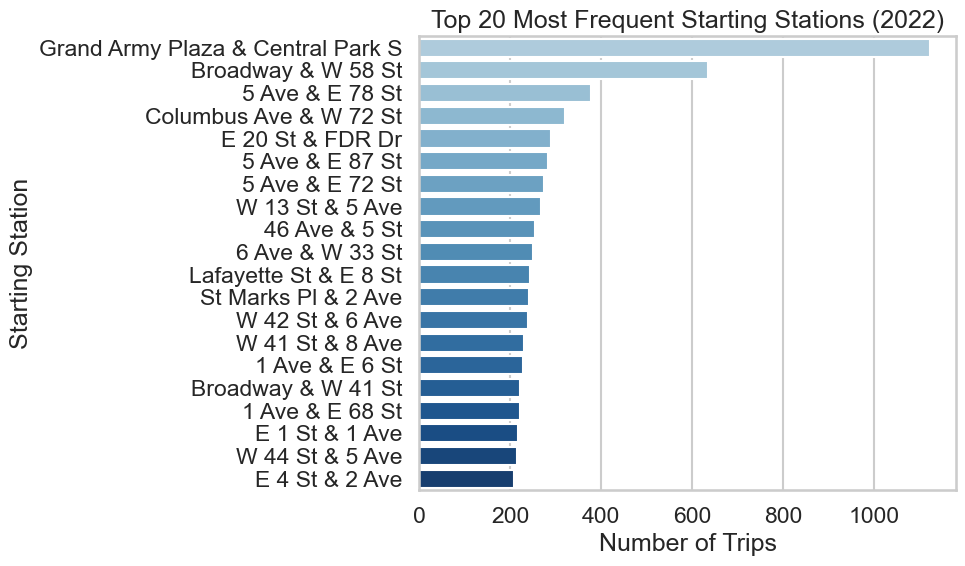

In [13]:
# Create the bar chart with gradient colors

from matplotlib import cm
n = len(top_stations)

# Use only the darker portion of the "Blues" colormap (avoid near-white)
cmap = cm.get_cmap("Blues")
colors = [cmap(x) for x in np.linspace(0.35, 0.95, n)]

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_stations,
    x="trip_count",
    y="start_station_name",
    hue="start_station_name",
    palette=colors,       
    dodge=False,
    legend=False
)

plt.title("Top 20 Most Frequent Starting Stations (2022)")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station")
plt.tight_layout()
plt.show()

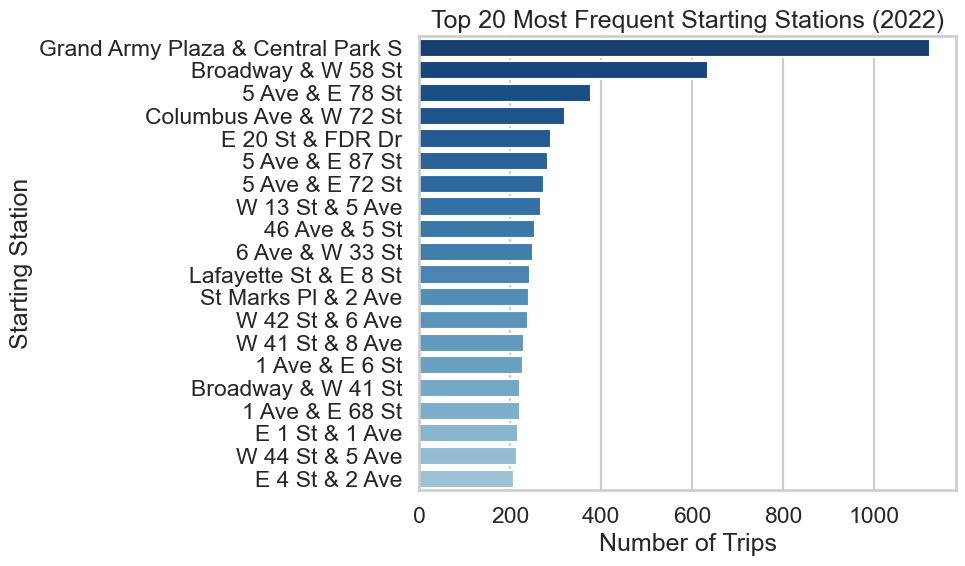

In [14]:
# Reverse the sequence of colors and remove the Matplotlib deprecation warning by using the new API

from matplotlib import colormaps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Order bars by frequency (highest first)
top_stations = top_stations.sort_values("trip_count", ascending=False)

n = len(top_stations)

# Get colormap using the modern Matplotlib API
cmap = colormaps["Blues"]

# Reverse the gradient so darkest = highest value
colors = [cmap(x) for x in np.linspace(0.95, 0.4, n)]

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_stations,
    x="trip_count",
    y="start_station_name",
    hue="start_station_name",
    palette=colors,
    dodge=False,
    legend=False
)

plt.title("Top 20 Most Frequent Starting Stations (2022)")
plt.xlabel("Number of Trips")
plt.ylabel("Starting Station")
plt.tight_layout()
plt.show()

**Bar chart color design - explanation:**

The initial version of the bar chart used a single color for all bars. While this was clean and readable, it did not visually reinforce the ranking of stations by trip frequency. To improve interpretability, I then used a sequential color gradient.

Next I reversed the color sequence so that the darkest shades correspond to the highest trip counts at the top of the chart. This final adjustment aligns color intensity with ranking and makes the most frequently used stations immediately identifiable.

4. Dual-axis line plot.

In [15]:
# Aggregate daily bike trips
df_daily_trips = (
    df_sample
    .groupby("date")
    .size()
    .reset_index(name="trips_per_day")
)

# Merge with daily weather
df_daily = df_daily_trips.merge(
    df_sample[["date", "avgTemp_C"]].drop_duplicates(),
    on="date",
    how="left"
)

df_daily.head()

,date,trips_per_day,avgTemp_C
0,2022-10-22,1,14.4
1,2022-10-31,7,14.4
2,2022-11-01,2151,16.9
3,2022-11-02,2298,17.6
4,2022-11-03,2367,15.7


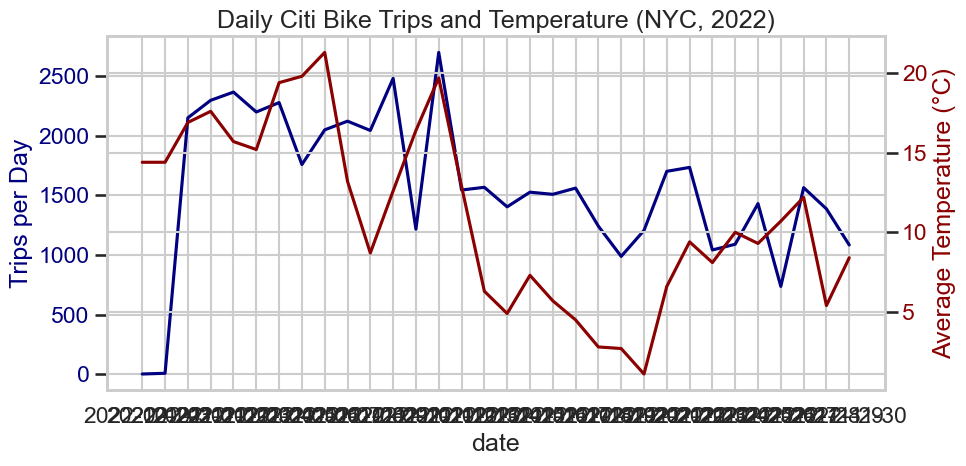

In [16]:
# Create the dual-axis Seaborn line plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bike trips (left axis)
sns.lineplot(
    data=df_daily,
    x="date",
    y="trips_per_day",
    ax=ax1,
    color="navy"
)
ax1.set_ylabel("Trips per Day", color="navy")
ax1.tick_params(axis="y", labelcolor="navy")

# Temperature (right axis)
ax2 = ax1.twinx()
sns.lineplot(
    data=df_daily,
    x="date",
    y="avgTemp_C",
    ax=ax2,
    color="darkred"
)
ax2.set_ylabel("Average Temperature (°C)", color="darkred")
ax2.tick_params(axis="y", labelcolor="darkred")

# Titles and layout
plt.title("Daily Citi Bike Trips and Temperature (NYC, 2022)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

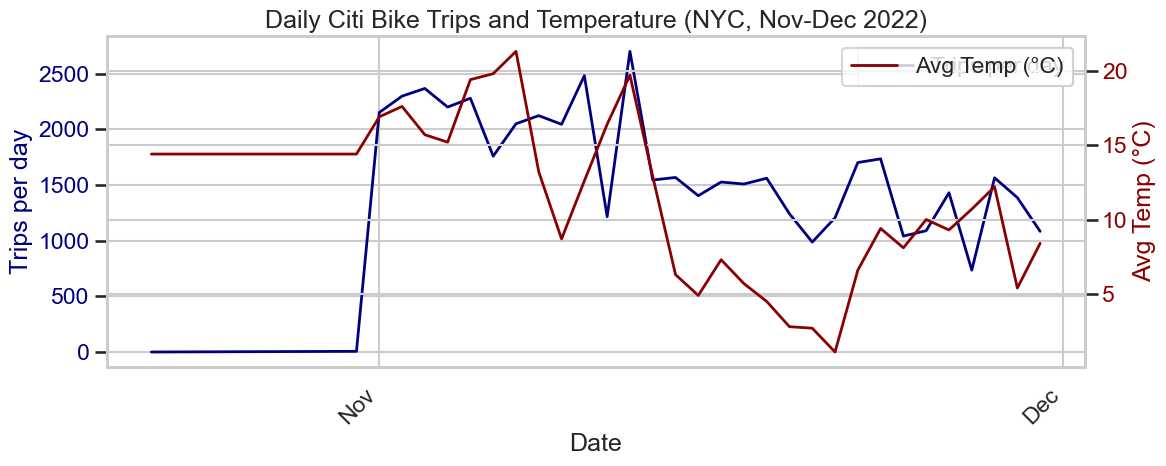

In [19]:
# Improve the line plot readability

import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date is datetime
df_daily["date"] = pd.to_datetime(df_daily["date"])

fig, ax1 = plt.subplots(figsize=(12, 5))

# Left axis: trips
sns.lineplot(
    data=df_daily,
    x="date",
    y="trips_per_day",
    ax=ax1,
    color="navy",
    linewidth=2,
    label="Trips per day",
)
ax1.set_ylabel("Trips per day", color="navy")
ax1.tick_params(axis="y", labelcolor="navy")

# Right axis: temperature
ax2 = ax1.twinx()
sns.lineplot(
    data=df_daily,
    x="date",
    y="avgTemp_C",
    ax=ax2,
    color="darkred",
    linewidth=2,
    label="Avg Temp (°C)",
)
ax2.set_ylabel("Avg Temp (°C)", color="darkred")
ax2.tick_params(axis="y", labelcolor="darkred")

# Fix x-axis readability (monthly ticks + improved formatting)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))

fig.autofmt_xdate(rotation=45)
ax1.set_xlabel("Date")
ax1.set_title("Daily Citi Bike Trips and Temperature (NYC, Nov-Dec 2022)")
fig.tight_layout()
plt.show()

**Line plot explanation**

This visualization is based on a sampled subset of the 2022 data (late-year observations) to ensure computational efficiency. While it does not represent the full year, it still illustrates the short-term relationship between temperature changes and bike usage.

5. Box plot.

I will use member_casual as the categorical variable and trip duration as the numeric variable.

This answers a clear question:

Do casual riders and members differ in how long they ride?

In [20]:
# Prepare trip duration

df_sample["tripduration_min"] = (
    pd.to_datetime(df_sample["ended_at"]) -
    pd.to_datetime(df_sample["started_at"])
).dt.total_seconds() / 60

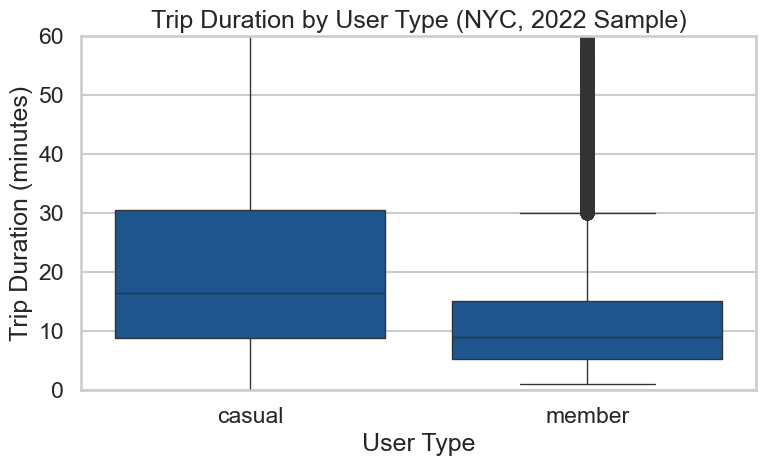

In [21]:
# Create the box plot

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_sample,
    x="member_casual",
    y="tripduration_min"
)

plt.ylim(0, 60) 
plt.title("Trip Duration by User Type (NYC, 2022 Sample)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")

plt.tight_layout()
plt.show()

**Box plot explanation - trip Duration by user type**

This box plot compares the distribution of trip durations between casual users and members. Casual riders have a higher median trip duration and a wider interquartile range, indicating that their rides are generally longer and more variable. 

In contrast, member trips are more tightly clustered around a lower median, suggesting more consistent, shorter rides typical of commuting behavior. The presence of more extreme outliers among casual users further supports the idea that casual riders are more likely to take long, leisure-oriented trips.

6. FacetGrid.

FacetGrid makes sense here, because it lets me compare the same distribution across categories (small multiples). In my project, a meaningful question is:

**Do members vs casual riders behave differently across seasons/months?**

FacetGrid will help me see whether patterns are consistent or change over time.

I can't load the full dataset, but I can still get a representative FacetGrid by reading in chunks and collecting 2,000 rows per month.

In [29]:
# Check column names

pd.read_csv(csv_path, nrows=5).columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp_C', '_merge'],
      dtype='object')

In [31]:
# Create tripduration_min from started_at and ended_at
use_cols = ["started_at", "ended_at", "member_casual"]

for chunk in pd.read_csv(
    csv_path,
    usecols=use_cols,
    parse_dates=["started_at", "ended_at"],
    chunksize=200_000
):
    chunk["tripduration_min"] = (chunk["ended_at"] - chunk["started_at"]).dt.total_seconds() / 60
    chunk = chunk.dropna(subset=["tripduration_min", "member_casual"])
    chunk = chunk[(chunk["tripduration_min"] > 0) & (chunk["tripduration_min"] <= 60)]
    chunk["month"] = chunk["started_at"].dt.month

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
use_cols = ["started_at", "ended_at", "member_casual"]
CHUNKSIZE = 200_000
SAMPLE_PER_MONTH = 1500     
MAX_MINUTES = 60           

rng = np.random.default_rng(42)
samples_by_month = {m: [] for m in range(1, 13)}
counts_by_month = {m: 0 for m in range(1, 13)}

# Import the CSV in chunks and build a balanced sample
for chunk in pd.read_csv(
    csv_path,
    usecols=use_cols,
    parse_dates=["started_at", "ended_at"],
    chunksize=CHUNKSIZE
):
    # compute duration in minutes
    chunk["tripduration_min"] = (chunk["ended_at"] - chunk["started_at"]).dt.total_seconds() / 60

    # basic cleaning
    chunk = chunk.dropna(subset=["tripduration_min", "member_casual", "started_at"])
    chunk = chunk[(chunk["tripduration_min"] > 0) & (chunk["tripduration_min"] <= MAX_MINUTES)]

    # month number
    chunk["month"] = chunk["started_at"].dt.month

    # take up to the remaining needed rows per month
    for m in range(1, 13):
        remaining = SAMPLE_PER_MONTH - counts_by_month[m]
        if remaining <= 0:
            continue

        sub = chunk[chunk["month"] == m][["month", "member_casual", "tripduration_min"]]
        if sub.empty:
            continue

        take_n = min(remaining, len(sub))
        samples_by_month[m].append(sub.sample(n=take_n, random_state=42))
        counts_by_month[m] += take_n

    # stop early if we’ve filled all months
    if all(counts_by_month[m] >= SAMPLE_PER_MONTH for m in range(1, 13)):
        break

# Combine into one dataframe
df_facet = pd.concat([pd.concat(v) for v in samples_by_month.values() if len(v) > 0], ignore_index=True)

# Add month labels for plotting + correct order
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_facet["month_name"] = pd.to_datetime(df_facet["month"], format="%m").dt.strftime("%b")

# Quick check
df_facet["month_name"].value_counts().reindex(month_order)

month_name
Jan    1500
Feb    1500
Mar    1500
Apr    1500
May    1500
Jun    1500
Jul    1500
Aug    1500
Sep    1500
Oct    1500
Nov    1500
Dec    1500
Name: count, dtype: int64

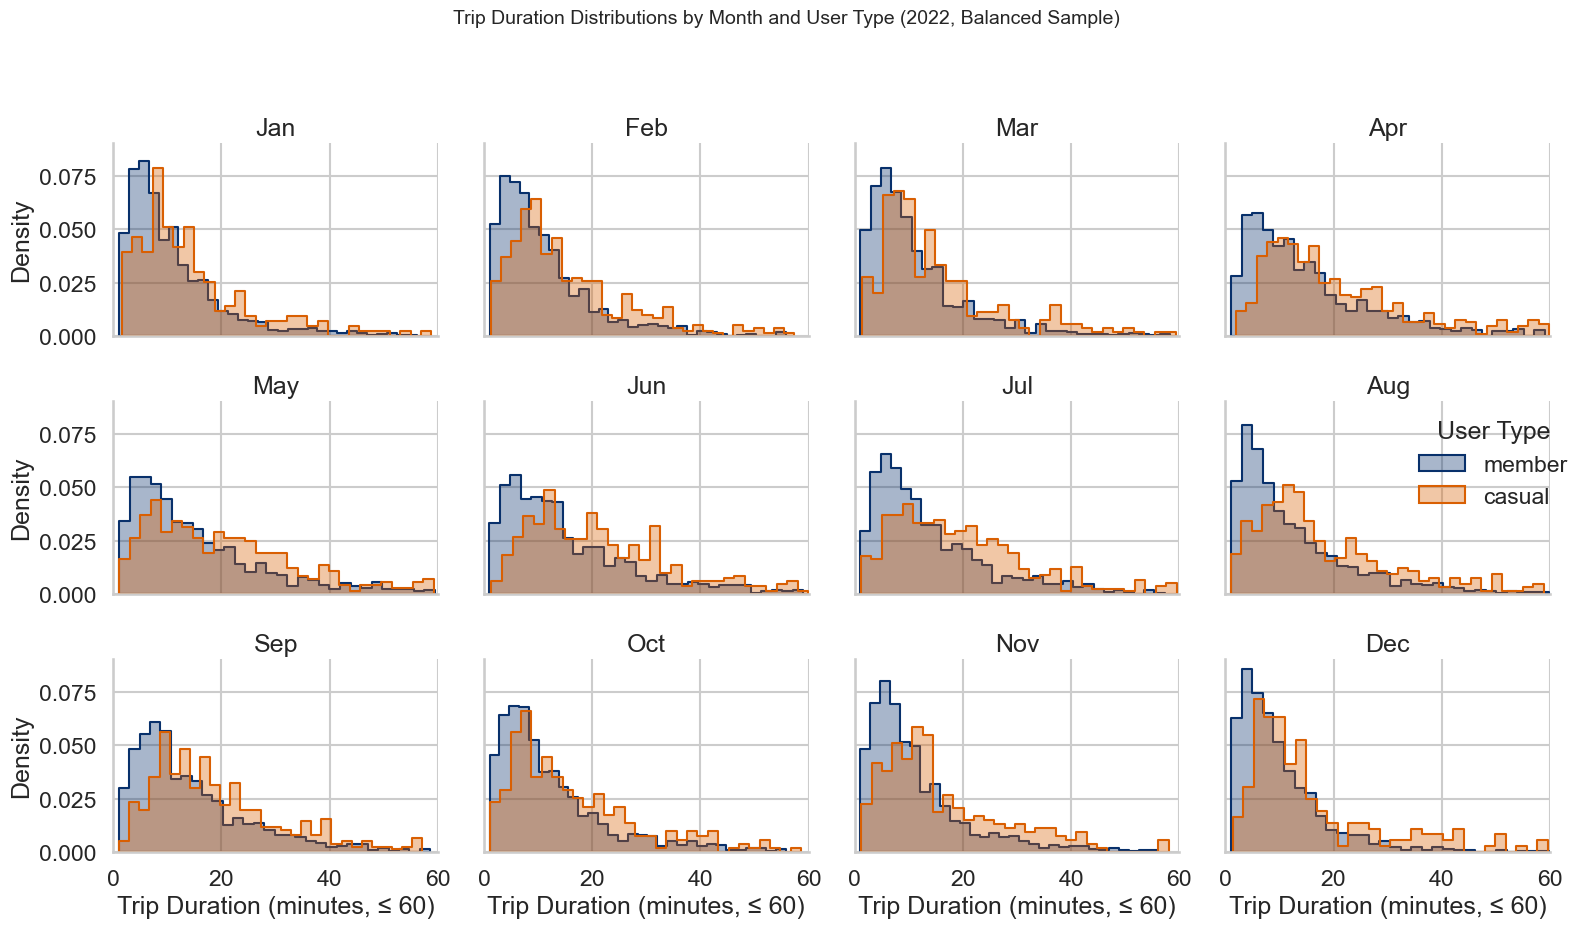

In [47]:
# Create FacetGrid

# Ensure month labels are created correctly
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_map = {i: m for i, m in enumerate(month_order, start=1)}

df_facet = df_facet.copy()
df_facet["month_name"] = df_facet["month"].map(month_map)

# Make month_name an ordered categorical so facets appear Jan..Dec
df_facet["month_name"] = pd.Categorical(df_facet["month_name"], categories=month_order, ordered=True)

# Make sure the key columns are valid + not missing
df_facet["tripduration_min"] = pd.to_numeric(df_facet["tripduration_min"], errors="coerce")
df_facet = df_facet.dropna(subset=["month_name", "member_casual", "tripduration_min"])
df_facet = df_facet[df_facet["tripduration_min"].between(0, MAX_MINUTES)]

# High-contrast palette (member vs casual)
user_palette = {
    "member": "#08306b",  # dark blue
    "casual": "#d95f02"   # strong orange
}

g = sns.FacetGrid(
    df_facet,
    col="month_name",
    col_order=month_order,
    col_wrap=4,
    hue="member_casual",
    palette=user_palette,
    height=3,
    aspect=1.2,
    sharex=True,
    sharey=True
)

g.map(
    sns.histplot,
    "tripduration_min",
    bins=30,
    stat="density",
    element="step",
    fill=True,
    alpha=0.35,
    common_norm=False
)

# Titles + labels
g.set_titles("{col_name}")  # shows "Jan", "Feb", ...
g.set_axis_labels(f"Trip Duration (minutes, ≤ {MAX_MINUTES})", "Density")
g.set(xlim=(0, MAX_MINUTES))

g.add_legend(title="User Type")
g.fig.suptitle(
    "Trip Duration Distributions by Month and User Type (2022, Balanced Sample)",
    y=1.04,
    fontsize=14
)

plt.tight_layout()
plt.show()

**FacetGrid Analysis: Trip Duration by Month and User Type**

This FacetGrid visualizes trip duration distributions across all months of 2022, split by user type (member vs. casual), using a balanced monthly sample to address memory constraints. By faceting the same distribution across months, it becomes clear that trip durations are consistently right-skewed, with most rides remaining under 20 minutes regardless of season. However, warmer months show slightly longer tails - especially for casual riders - indicating increased recreational usage during summer, while colder months exhibit tighter, shorter distributions. This confirms that seasonality affects trip duration more strongly for casual users, while member behavior remains relatively stable throughout the year.

**Overall summary**

In this notebook, I analyzed Citi Bike usage patterns in 2022 using seaborn to explore spatial, temporal, and behavioral trends. I began by identifying and visualizing the top 20 most frequently used starting stations, which highlights key high-demand locations across the city.

I then recreated the dual-axis line chart from the previous exercise to examine the relationship between daily trip volume and temperature. The visualization shows clear seasonality, with higher ridership during warmer periods and a decline as temperatures drop.

To compare rider behaviour, I used box plots and distribution plots to examine trip duration by user type. These plots show that casual riders tend to take longer and more variable trips, while members exhibit shorter and more consistent ride durations.

Because the full 2022 dataset is too large to load into memory, I implemented a balanced, stratified sampling approach using chunked reading. By sampling an equal number of trips per month, I preserved seasonal coverage while keeping the analysis computationally feasible. This sampled data was then used to create a FacetGrid, allowing for side-by-side comparison of trip duration distributions across months and user types. The FacetGrid reveals stronger right tails during summer months - especially for casual riders - suggesting more leisure-oriented usage during warmer seasons.